1. Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)
2. Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
3. Как распределяется бюджет на разные группы (department) с течением времени?
4. Какое количество людей в каждом департаменте? 
5. Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к) 
6. На базе линейной регрессии постройте прогноз по тому, какие будут закупке в следующий год по каждому департаменту



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score
import matplotlib.pyplot as plt
from sklearn import tree
from google.colab import drive

In [2]:

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/My\ Drive

/content/drive/My Drive


In [4]:
# загрузила файл .csv в google.colab

from google.colab import files 
uploaded = files.upload()

Saving Salaries.csv to Salaries (13).csv


In [38]:
# загрузила файл .csv в pandas DataFrame

Salaries_df = pd.read_csv('Salaries.csv')
Salaries_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95097,95098,Kyaw M Thwin,Custodian,55026.00,5762.46,2928.25,25120.81,63716.71,88837.52,2013.0,NaN,San Francisco,NaN
95098,95099,Goldie Pui Yi Tse,Medical Records Clerk,62109.07,0.00,647.25,26077.14,62756.32,88833.46,2013.0,NaN,San Francisco,NaN
95099,95100,Stanley J Ellicott,Senior Administrative Analyst,70158.20,0.00,0.00,18671.48,70158.20,88829.68,2013.0,NaN,San Francisco,NaN
95100,95101,Reginald T Gage,Recreation Coordinator,61398.03,0.00,1346.62,26084.20,62744.65,88828.85,2013.0,NaN,San Francisco,NaN


In [39]:
# получила информацию по датафрейму, в колонках Notes и Status значения отсутствуют

Salaries_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95102 entries, 0 to 95101
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                95102 non-null  int64  
 1   EmployeeName      95102 non-null  object 
 2   JobTitle          95102 non-null  object 
 3   BasePay           95093 non-null  float64
 4   OvertimePay       95101 non-null  float64
 5   OtherPay          95101 non-null  float64
 6   Benefits          58942 non-null  float64
 7   TotalPay          95101 non-null  float64
 8   TotalPayBenefits  95101 non-null  float64
 9   Year              95101 non-null  float64
 10  Notes             0 non-null      float64
 11  Agency            95101 non-null  object 
 12  Status            0 non-null      float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.4+ MB


In [40]:
# удалила колонки без данных

df = Salaries_df.drop(['Notes','Status'], axis = 1) 
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
95097,95098,Kyaw M Thwin,Custodian,55026.00,5762.46,2928.25,25120.81,63716.71,88837.52,2013.0,San Francisco
95098,95099,Goldie Pui Yi Tse,Medical Records Clerk,62109.07,0.00,647.25,26077.14,62756.32,88833.46,2013.0,San Francisco
95099,95100,Stanley J Ellicott,Senior Administrative Analyst,70158.20,0.00,0.00,18671.48,70158.20,88829.68,2013.0,San Francisco
95100,95101,Reginald T Gage,Recreation Coordinator,61398.03,0.00,1346.62,26084.20,62744.65,88828.85,2013.0,San Francisco


In [41]:
# проверила остальные на количество пропусков, много пропусков в колонке Benefits - выгоды

for col in df.columns:
  print(col, round(df[col].isna().sum() / df.shape[0] *100,2)) 

Id 0.0
EmployeeName 0.0
JobTitle 0.0
BasePay 0.01
OvertimePay 0.0
OtherPay 0.0
Benefits 38.02
TotalPay 0.0
TotalPayBenefits 0.0
Year 0.0
Agency 0.0


In [42]:
# проверила на дубликаты

df.duplicated().sum() 

0

In [43]:
# удалила колонку Benefits

df1 = df.drop(['Benefits'], axis = 1) 
df1

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011.0,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011.0,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011.0,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011.0,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...
95097,95098,Kyaw M Thwin,Custodian,55026.00,5762.46,2928.25,63716.71,88837.52,2013.0,San Francisco
95098,95099,Goldie Pui Yi Tse,Medical Records Clerk,62109.07,0.00,647.25,62756.32,88833.46,2013.0,San Francisco
95099,95100,Stanley J Ellicott,Senior Administrative Analyst,70158.20,0.00,0.00,70158.20,88829.68,2013.0,San Francisco
95100,95101,Reginald T Gage,Recreation Coordinator,61398.03,0.00,1346.62,62744.65,88828.85,2013.0,San Francisco


In [44]:
# группирую по году

df1.groupby('Year')['Year'].count() 


Year
2011.0    36159
2012.0    36766
2013.0    22176
Name: Year, dtype: int64

<Figure size 432x288 with 0 Axes>

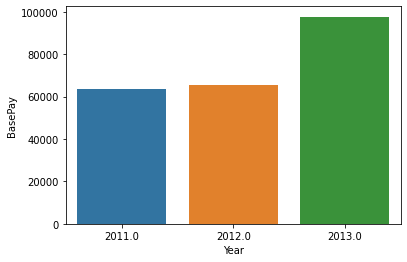

<Figure size 432x288 with 0 Axes>

In [45]:
# сравниваю изменение зп в течении времени - посмотрим базовую зп (по всем вакансиям)


import seaborn as sns 

sal = df1.groupby('Year').mean()
sal.reset_index(inplace=True)
sns.barplot(x = 'Year', y='BasePay' , data = sal)
plt.figure()


In [46]:
# посмотрим кол-во зарплат разных должностей


df1['JobTitle'].value_counts()

Transit Operator                                      3861
Registered Nurse                                      2392
TRANSIT OPERATOR                                      2388
Special Nurse                                         1629
Police Officer 3                                      1588
                                                      ... 
Braillist                                                1
SENIOR SUPERVISING PROBATION OFFICER, JUVENILE POU       1
WHARFINGER I                                             1
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)                   1
TREASURER                                                1
Name: JobTitle, Length: 2112, dtype: int64

Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)


In [47]:
# выбрала зарплаты пожарных, сохранила в новый DataFrame

t1 = df1.JobTitle.str.contains('FIRE DEPARTMENT') 
fire_df = df1[t1]
fire_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011.0,San Francisco
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,315981.05,315981.05,2011.0,San Francisco
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,303427.55,303427.55,2011.0,San Francisco
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,302377.73,302377.73,2011.0,San Francisco
10,11,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999.39,71344.88,33149.90,299494.17,299494.17,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...
4955,4956,AUDRY LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",21804.00,46307.75,56392.91,124504.66,124504.66,2011.0,San Francisco
5498,5499,VINCENT PEREZ,"LIEUTENANT, FIRE DEPARTMENT",59663.78,13979.51,47704.14,121347.43,121347.43,2011.0,San Francisco
8436,8437,JENSEN RHODES,"LIEUTENANT, FIRE DEPARTMENT",93066.59,1626.13,10703.77,105396.49,105396.49,2011.0,San Francisco
16285,16286,AARON STEVENSON,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",21948.99,14065.26,37430.72,73444.97,73444.97,2011.0,San Francisco


In [48]:
# сгруппировала по году

fire_df['BasePay'] = df['BasePay'].apply(pd.to_numeric, downcast='float', errors='coerce') 
fire_df.groupby(['Year','JobTitle'],as_index=False).mean()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,JobTitle,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,2011.0,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",5454.666667,131621.046667,40684.903333,31121.900000,203427.850000,203427.850000
1,2011.0,"BATTALION CHIEF, (FIRE DEPARTMENT)",1092.866667,144875.108667,35115.257333,36665.170889,216655.536889,216655.536889
2,2011.0,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",10.000000,285262.000000,0.000000,17115.730000,302377.730000,302377.730000
3,2011.0,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",26.000000,199852.653333,4605.000000,74901.906667,279359.560000,279359.560000
4,2011.0,"LIEUTENANT, FIRE DEPARTMENT",1729.088235,123166.477471,24492.825941,16491.918588,164151.222000,164151.222000


In [49]:
# нашла максимальную базовую зарплату

fire_df['BasePay'].max() 

285262.0

In [50]:
# нашла среднее значение

fire_df['BasePay'].mean() 

129447.58630630636

In [51]:
# нашла медианное значение

fire_df['BasePay'].median() # медианное значение

123105.02

In [52]:
# нашла максимальную, медианную и среднюю зп с указанием должности

display(fire_df[["JobTitle","TotalPay","Year",]].groupby(["JobTitle","Year"]).agg(["max",'median',"min"]).style.background_gradient(cmap="CMRmap_r")) 

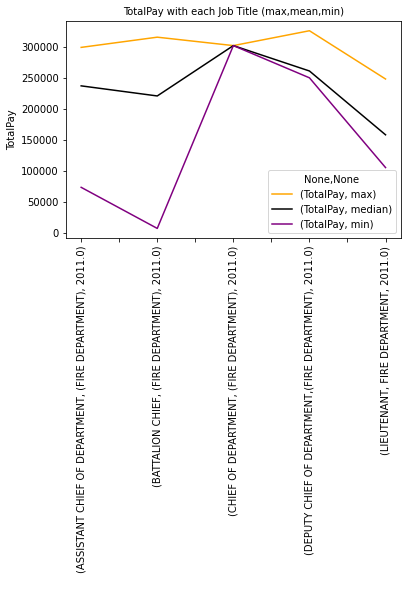

In [53]:
# проиллюстрировала наглядно максимальную, медианную и среднюю зп

fire_df[["JobTitle","TotalPay","Year",]].groupby(["JobTitle","Year"]).agg(["max",'median',"min"]).plot(kind="line",color =["orange","black","purple"]) 
plt.title("TotalPay with each Job Title (max,mean,min)", fontsize=10)
plt.ylabel("TotalPay",fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

In [54]:
# выбрала зарплаты медиков, сохранила в новый DataFrame

t2 = df1.JobTitle.str.contains('MEDIC')
med_df = df1[t2]
med_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
17,18,SEBASTIAN WONG,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140546.87,119397.26,18625.08,278569.21,278569.21,2011.0,San Francisco
19,20,ELLEN MOFFATT,ASSISTANT MEDICAL EXAMINER,257510.59,880.16,16159.50,274550.25,274550.25,2011.0,San Francisco
20,21,VENUS AZAR,ASSISTANT MEDICAL EXAMINER,257510.48,0.00,16679.79,274190.27,274190.27,2011.0,San Francisco
21,22,JUDY MELINEK,ASSISTANT MEDICAL EXAMINER,257510.44,377.21,15883.56,273771.21,273771.21,2011.0,San Francisco
36,37,SUSAN CURRIN,"ADMINISTRATOR, SFGH MEDICAL CENTER",245124.44,0.00,12000.00,257124.44,257124.44,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...
35597,35598,JOHN CORTEZ,MEDICAL SOCIAL WORKER,0.00,0.00,672.04,672.04,672.04,2011.0,San Francisco
35732,35733,NICOLE BARTOLINI,MEDICAL SOCIAL WORKER,516.40,0.00,20.66,537.06,537.06,2011.0,San Francisco
35764,35765,CRAIG STROOPE,MEDICAL EXAMINER'S INVESTIGATOR I,0.00,0.00,481.02,481.02,481.02,2011.0,San Francisco
36076,36077,DEBRA TANIS,FIRE RESCUE PARAMEDIC,0.00,0.00,92.21,92.21,92.21,2011.0,San Francisco


In [55]:
# сгруппировала по году

med_df['BasePay'] = df['BasePay'].apply(pd.to_numeric, downcast='float', errors='coerce') 
med_df.groupby(['Year','JobTitle'],as_index=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,JobTitle,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,2011.0,"ADMINISTRATOR, SFGH MEDICAL CENTER",37.000000,245124.440000,0.000000,12000.000000,257124.440000,257124.440000
1,2011.0,ASSISTANT MEDICAL EXAMINER,3170.400000,199964.568000,251.474000,12577.130000,212793.172000,212793.172000
2,2011.0,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",2775.208333,131835.131250,24316.274167,17859.551250,174010.956667,174010.956667
3,2011.0,EMERGENCY MEDICAL SERVICES AGENCY SPECIALIST,17472.833333,63474.136667,0.000000,8974.040000,72448.176667,72448.176667
4,2011.0,FIRE FIGHTER PARAMEDIC,6230.730897,102572.556246,15239.395714,11616.559136,129428.511096,129428.511096
5,2011.0,FIRE RESCUE PARAMEDIC,15513.285714,67346.748571,1426.511429,12171.924286,80945.184286,80945.184286
6,2011.0,MEDICAL EVALUATIONS ASSISTANT,25231.272727,41968.424364,1260.968061,1311.529758,44540.922182,44540.922182
7,2011.0,MEDICAL EXAMINER'S INVESTIGATOR I,29786.900000,19584.314000,640.706000,518.185000,20743.205000,20743.205000
8,2011.0,MEDICAL EXAMINER'S INVESTIGATOR II,8875.375000,83139.748750,12349.671250,8333.238750,103822.658750,103822.658750
9,2011.0,MEDICAL EXAMINER'S INVESTIGATOR III,8301.500000,68877.580000,5702.905000,31607.910000,106188.395000,106188.395000


In [56]:
# нашла максимальную зп

med_df['BasePay'].max()

257510.59

In [57]:
# нашла среднее значение зп

med_df['BasePay'].mean()

75859.64047361302

In [58]:
# нашла медианное значение зп

med_df['BasePay'].median()

71777.32

In [59]:
 # нашла максимальную, медианную и среднюю зп с указанием должности

display(med_df[["JobTitle","TotalPay","Year",]].groupby(["JobTitle","Year"]).agg(["max",'median',"min"]).style.background_gradient(cmap="CMRmap_r")) 

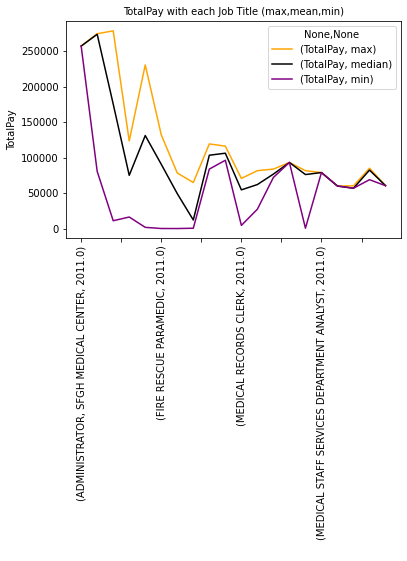

In [60]:
# проиллюстрировала наглядно распределение зп

med_df[["JobTitle","TotalPay","Year",]].groupby(["JobTitle","Year"]).agg(["max",'median',"min"]).plot(kind="line",color =["orange","black","purple"]) 
plt.title("TotalPay with each Job Title (max,mean,min)", fontsize=10)
plt.ylabel("TotalPay",fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

In [61]:
# выбрала зарплаты полицейских, сохранила в новый DataFrame

t3 = df1.JobTitle.str.contains('POLICE')
police_df = df1[t3]
police_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011.0,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011.0,San Francisco
11,12,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722.00,87082.62,110804.30,297608.92,297608.92,2011.0,San Francisco
15,16,RICHARD CORRIEA,"COMMANDER III, (POLICE DEPARTMENT)",198778.01,73478.20,13957.65,286213.86,286213.86,2011.0,San Francisco
25,26,GREGORY SUHR,CHIEF OF POLICE,256470.41,0.00,11522.18,267992.59,267992.59,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...
35131,35132,CYNTHIA HAYNES-EPPERSON,SENIOR POLICE COMMUNICATIONS DISPATCHER,1006.40,0.00,361.82,1368.22,1368.22,2011.0,San Francisco
35151,35152,LYNN BLOOM,POLICE SERVICES AIDE,0.00,0.00,1324.80,1324.80,1324.80,2011.0,San Francisco
35318,35319,ROBERT CHAPMAN,POLICE OFFICER III,0.00,0.00,1088.00,1088.00,1088.00,2011.0,San Francisco
35671,35672,RUSSELL MATLI,POLICE OFFICER III,0.00,0.00,597.31,597.31,597.31,2011.0,San Francisco


In [62]:
# сгруппировала по году

police_df['BasePay'] = df['BasePay'].apply(pd.to_numeric, downcast='float', errors='coerce')
police_df.groupby(['Year','JobTitle'],as_index=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,JobTitle,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,2011.0,AIRPORT POLICE SERVICES AIDE,20580.267380,51178.742834,5478.936096,3472.252353,60129.931283,60129.931283
1,2011.0,ASSISTANT INSPECTOR (POLICE DEPARTMENT),434.000000,123169.950000,45679.840000,20149.410000,188999.200000,188999.200000
2,2011.0,ASSISTANT INSPECTOR II (POLICE DEPARTMENT),2250.100000,127866.102000,13547.629000,9475.130000,150888.861000,150888.861000
3,2011.0,ASSISTANT INSPECTOR III (POLICE DEPARTMENT),2183.888889,130479.954444,13373.892222,8817.368889,152671.215556,152671.215556
4,2011.0,CAPTAIN III (POLICE DEPARTMENT),670.189189,170183.408649,15874.425405,25726.059189,211783.893243,211783.893243
5,2011.0,CHIEF OF POLICE,26.000000,256470.410000,0.000000,11522.180000,267992.590000,267992.590000
6,2011.0,"COMMANDER III, (POLICE DEPARTMENT)",731.571429,167042.752857,15796.962857,22296.791429,205136.507143,205136.507143
7,2011.0,DEPUTY CHIEF III (POLICE DEPARTMENT),47.000000,219758.726000,0.000000,30267.762000,250026.488000,250026.488000
8,2011.0,"INSPECTOR II, (POLICE DEPARTMENT)",2698.666667,128145.436667,9213.790000,6923.510000,144282.736667,144282.736667
9,2011.0,"INSPECTOR III, (POLICE DEPARTMENT)",2461.481481,120294.284259,14408.287593,19423.711605,154126.283457,154126.283457


In [63]:
# нашла максимальную зп

police_df['BasePay'].max()

261717.6

In [64]:
# нашла среднее значение зп

police_df['BasePay'].mean()

105981.21477308912

In [65]:
# нашла медианную зп

police_df['BasePay'].median()

111976.14

In [66]:
# нашла максимальную, минимальную и среднюю зп с указанием должности

display(police_df[["JobTitle","TotalPay","Year",]].groupby(["JobTitle","Year"]).agg(["max",'median',"min"]).style.background_gradient(cmap="CMRmap_r"))

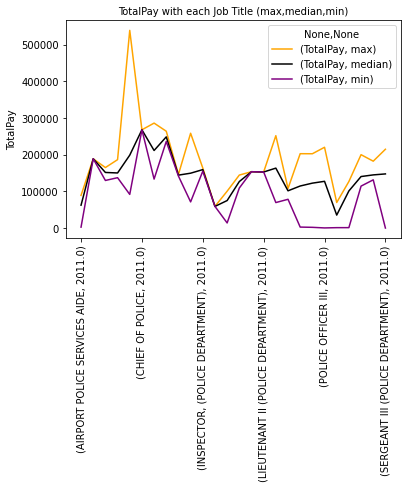

In [67]:
# проиллюстрируем наглядно распределение зп

police_df[["JobTitle","TotalPay","Year",]].groupby(["JobTitle","Year"]).agg(["max",'median',"min"]).plot(kind="line",color =["orange","black","purple"])
plt.title("TotalPay with each Job Title (max,median,min)", fontsize=10)
plt.ylabel("TotalPay",fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


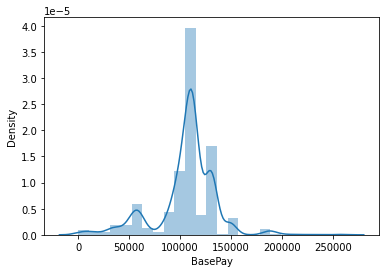

In [68]:
# посмотрела плотность распределения базовой зп работников полиции

import seaborn as sns
from pandas import Series,DataFrame
sns.distplot(police_df['BasePay'],bins=25)
plt.show()

<Figure size 432x288 with 0 Axes>

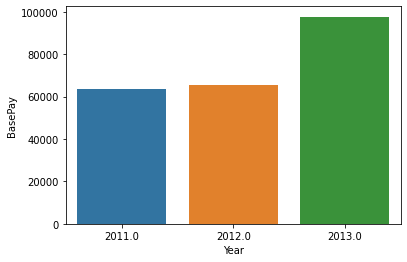

<Figure size 432x288 with 0 Axes>

In [69]:
# посмотрела как со временем менялась базовая зп работников полиции

police = police_df.groupby('Year').mean()
police.reset_index(inplace=True)
sns.barplot(x = 'Year', y='BasePay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


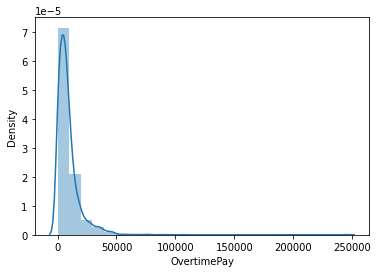

In [70]:
# посмотрела плотность распределения сверхурочных работников полиции

sns.distplot(police_df['OvertimePay'],bins=25) 
plt.show()

<Figure size 432x288 with 0 Axes>

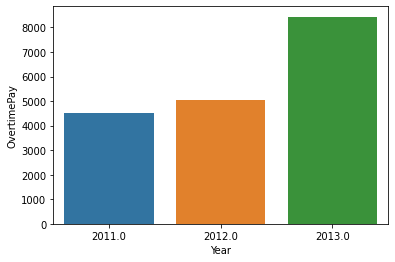

<Figure size 432x288 with 0 Axes>

In [71]:
# посмотрела как со временем менялись сверхурочные работников полиции

police = police_df.groupby('Year').mean()
police.reset_index(inplace=True)
sns.barplot(x = 'Year', y='OvertimePay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


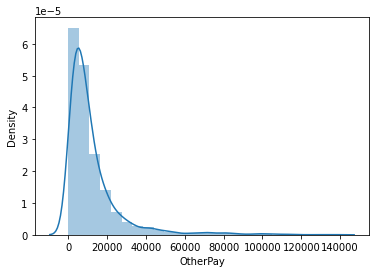

In [72]:
# посмотрела плотность распределения льгот работников полиции

sns.distplot(police_df['OtherPay'],bins=25) 
plt.show()

<Figure size 432x288 with 0 Axes>

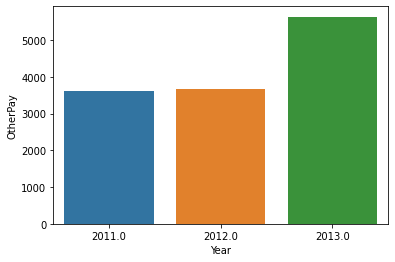

<Figure size 432x288 with 0 Axes>

In [73]:
# посмотрела как со временем менялись льготы работников полиции

police = police_df.groupby('Year').mean() 
police.reset_index(inplace=True)
sns.barplot(x = 'Year', y='OtherPay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


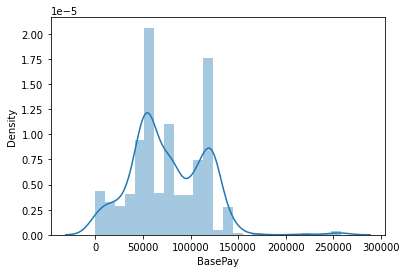

In [74]:
# посмотрела плотность распределения базовой зп медиков

sns.distplot(med_df['BasePay'],bins=25) 
plt.show()

<Figure size 432x288 with 0 Axes>

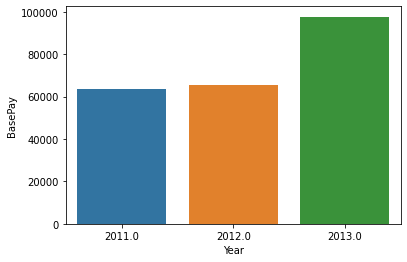

<Figure size 432x288 with 0 Axes>

In [75]:
# посмотрела как со временем менялась базовая зп медиков

med = med_df.groupby('Year').mean() 
med.reset_index(inplace=True)
sns.barplot(x = 'Year', y='BasePay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


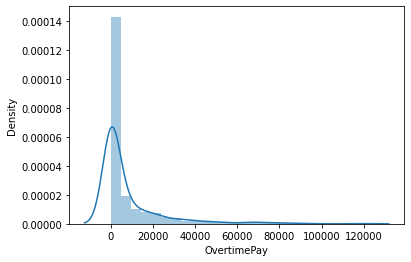

In [76]:
# посмотрела плотность распределения сверхурочных медиков

sns.distplot(med_df['OvertimePay'],bins=25) 
plt.show()

<Figure size 432x288 with 0 Axes>

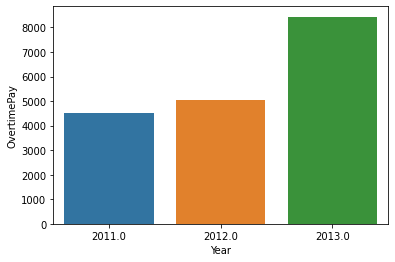

<Figure size 432x288 with 0 Axes>

In [77]:
# посмотрела как со временем менялись сверхурочные медиков

med = med_df.groupby('Year').mean() 
med.reset_index(inplace=True)
sns.barplot(x = 'Year', y='OvertimePay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


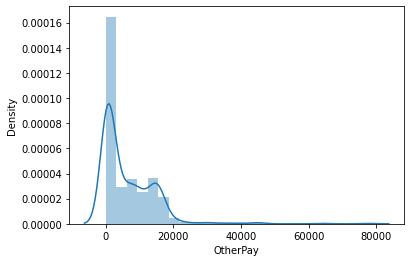

In [78]:
# посмотрела плотность распределения льгот медиков

sns.distplot(med_df['OtherPay'],bins=25) 
plt.show()

<Figure size 432x288 with 0 Axes>

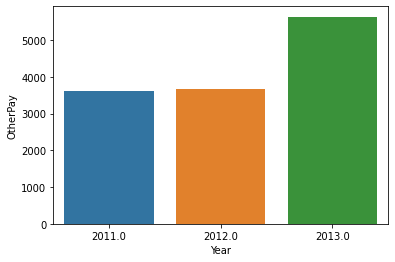

<Figure size 432x288 with 0 Axes>

In [79]:
# посмотрела как со временем менялись льготы медиков

med = med_df.groupby('Year').mean() 
med.reset_index(inplace=True)
sns.barplot(x = 'Year', y='OtherPay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


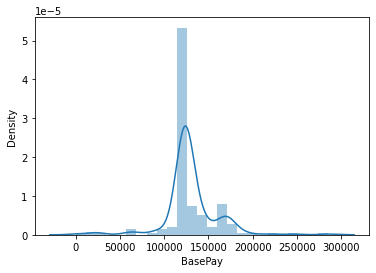

In [80]:
# посмотрела плотность распределения базовой зп пожарных

sns.distplot(fire_df['BasePay'],bins=25) 

<Figure size 432x288 with 0 Axes>

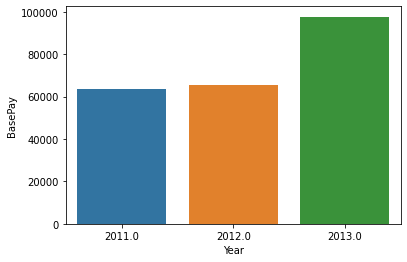

<Figure size 432x288 with 0 Axes>

In [81]:
# посмотрела как со временем менялась базовая пожарных

fire = fire_df.groupby('Year').mean() 
fire.reset_index(inplace=True)
sns.barplot(x = 'Year', y='BasePay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


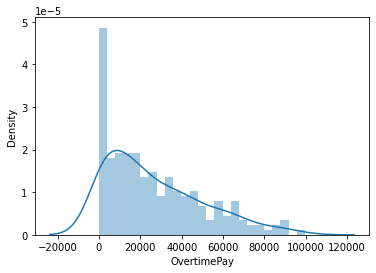

In [82]:
# посмотрела плотность распределения сверхурочных пожарных

sns.distplot(fire_df['OvertimePay'],bins=25) 
plt.show()

<Figure size 432x288 with 0 Axes>

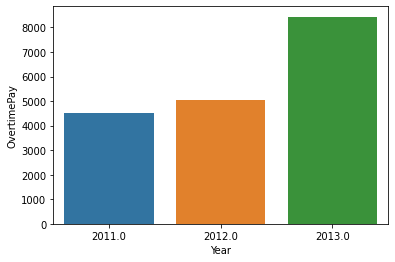

<Figure size 432x288 with 0 Axes>

In [83]:
# посмотрела как со временем менялись сверхурочные пожарных

fire = fire_df.groupby('Year').mean() 
fire.reset_index(inplace=True)
sns.barplot(x = 'Year', y='OvertimePay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


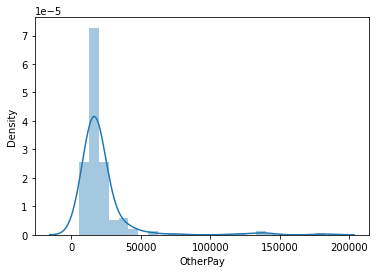

In [84]:
# посмотрела плотность распределения льгот пожарных

sns.distplot(fire_df['OtherPay'],bins=25) 
plt.show()

<Figure size 432x288 with 0 Axes>

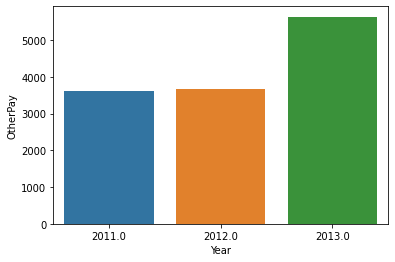

<Figure size 432x288 with 0 Axes>

In [85]:
# посмотрела как со временем менялись льготы пожарных

fire = fire_df.groupby('Year').mean() 
fire.reset_index(inplace=True)
sns.barplot(x = 'Year', y='OtherPay' , data = sal)
plt.figure()

Как распределяется бюджет на разные группы (department) с течением времени?

In [86]:
# создала новый датафрейм, в котором рассчитала дополнительный доход пожарных и удалила лишние колонки

fi = fire.query('2011 == Year')
f1 = fi.drop(['Year','Id', 'BasePay', 'OvertimePay'], axis = 1) 
f1

,OtherPay,TotalPay,TotalPayBenefits
0,21570.927928,177504.265135,177504.265135


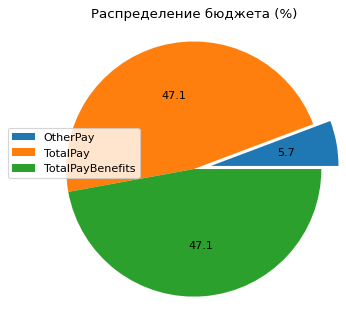

In [87]:
# построила диаграмму распределения дополнительного дохода пожарных

data_names = ['OtherPay', 'TotalPay', 'TotalPayBenefits']
data_values = [21571, 177504, 177504]
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )

plt.title('Распределение бюджета (%)')

xs = range(len(data_names))

plt.pie(
    data_values, autopct='%.1f', radius = 1.1,
    explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    loc = 'lower left', labels = data_names )
fig.savefig('pie.png')

In [88]:
# создала новый датафрейм, в котором рассчитала дополнительный доход медиков и удалила лишние колонки

mi = med.query('2011 == Year')
m1 = mi.drop(['Year','Id', 'BasePay', 'OvertimePay'], axis = 1)  
m1

,OtherPay,TotalPay,TotalPayBenefits
0,6296.708173,89913.511123,89913.511123


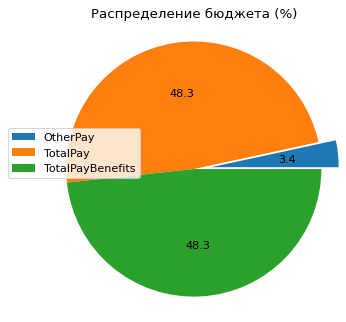

In [89]:
# построила диаграмму распределения дополнительного дохода медиков 

data_names = ['OtherPay', 'TotalPay', 'TotalPayBenefits']
data_values = [6297, 89914, 89914]
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )

plt.title('Распределение бюджета (%)')

xs = range(len(data_names))

plt.pie(
    data_values, autopct='%.1f', radius = 1.1,
    explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    loc = 'lower left', labels = data_names )
fig.savefig('pie.png')

In [90]:
# создала новый датафрейм, в котором рассчитала дополнительный доход полицейских и удалила лишние колонки

pi = police.query('2011 == Year')
p1 = pi.drop(['Year','Id', 'BasePay', 'OvertimePay'], axis = 1)  
p1

,OtherPay,TotalPay,TotalPayBenefits
0,12268.116055,127097.17166,127097.17166


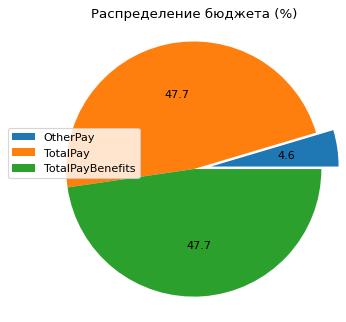

In [91]:
# построила диаграмму распределения дополнительного дохода полицейских 

data_names = ['OtherPay', 'TotalPay', 'TotalPayBenefits']
data_values = [12268, 127097, 127097]
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )

plt.title('Распределение бюджета (%)')

xs = range(len(data_names))

plt.pie(
    data_values, autopct='%.1f', radius = 1.1,
    explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    loc = 'lower left', labels = data_names )
fig.savefig('pie.png')

Какое количество людей в каждом департаменте?

In [92]:
# определила кол-во людей в каждом департаменте. Для этого провела группировку по имени и должности

# 222 пожарных

fire_df.groupby(['EmployeeName', 'JobTitle']).count() 

Id  ...  Agency
EmployeeName         JobTitle                                              ...        
AARON STEVENSON      ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)   1  ...       1
                     LIEUTENANT, FIRE DEPARTMENT                        1  ...       1
AISHA KRIEGER        LIEUTENANT, FIRE DEPARTMENT                        1  ...       1
ALAN REYNAUD         LIEUTENANT, FIRE DEPARTMENT                        1  ...       1
ALAN WONG            LIEUTENANT, FIRE DEPARTMENT                        1  ...       1
...                                                                    ..  ...     ...
VINCENT PEREZ        LIEUTENANT, FIRE DEPARTMENT                        1  ...       1
WALTER VILLAVICENCIO LIEUTENANT, FIRE DEPARTMENT                        1  ...       1
WAYNE WONG           LIEUTENANT, FIRE DEPARTMENT                        1  ...       1
WILLIAM MCFARLAND    LIEUTENANT, FIRE DEPARTMENT                        1  ...       1
ZACHARY PUMPHREY     BATTALION CHIEF, (FIRE DEPARTMENT)                 1  ...       1

[222 rows x 8 columns]

In [94]:
# 2507 полицейских

police_df.groupby(['EmployeeName', 'JobTitle']).count() 

,,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
EmployeeName,JobTitle,,,,,,,,
AARON BALLONADO,POLICE OFFICER II,1,1,1,1,1,1,1,1
AARON COWHIG,POLICE OFFICER II,1,1,1,1,1,1,1,1
AARON FISCHER,POLICE OFFICER III,1,1,1,1,1,1,1,1
AARON FOLTZ,POLICE OFFICER II,1,1,1,1,1,1,1,1
AARON LOZADA,SERGEANT III (POLICE DEPARTMENT),1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
YVETTE POINDEXTER,POLICE OFFICER I,1,1,1,1,1,1,1,1
YVONNE ALLEN,"INSPECTOR III, (POLICE DEPARTMENT)",1,1,1,1,1,1,1,1
YVONNE MOILANEN,POLICE OFFICER II,1,1,1,1,1,1,1,1


In [95]:
# 739 медработников

med_df.groupby(['EmployeeName', 'JobTitle']).count() 

,,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
EmployeeName,JobTitle,,,,,,,,
ADAM DOMINGUEZ,MEDICAL EXAMINER'S INVESTIGATOR I,1,1,1,1,1,1,1,1
ADAM HELLMAN,MEDICAL EXAMINER'S INVESTIGATOR I,1,1,1,1,1,1,1,1
ADAM LEWIS,FIRE FIGHTER PARAMEDIC,1,1,1,1,1,1,1,1
AL GARZA,FIRE FIGHTER PARAMEDIC,1,1,1,1,1,1,1,1
ALAN PRINGLE,MEDICAL EXAMINER'S INVESTIGATOR III,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
YOLANDA HERRON,MEDICAL RECORDS CLERK,1,1,1,1,1,1,1,1
YUBING XUE,MEDICAL EVALUATIONS ASSISTANT,1,1,1,1,1,1,1,1
YVETTE ANDERSON,MEDICAL EVALUATIONS ASSISTANT,1,1,1,1,1,1,1,1


Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к)

In [ ]:
med_df.groupby('BasePay')['BasePay'].count() # сгруппируем по размеру базовой зп

BasePay
0.00         10
516.40        1
597.80        1
1408.80       1
2221.86       1
             ..
217410.80     1
245124.44     1
257510.44     1
257510.48     1
257510.59     1
Name: BasePay, Length: 557, dtype: int64

In [ ]:
me_df = med_df[['EmployeeName', 'BasePay']]
me_df

,EmployeeName,BasePay
17,SEBASTIAN WONG,140546.87
19,ELLEN MOFFATT,257510.59
20,VENUS AZAR,257510.48
21,JUDY MELINEK,257510.44
36,SUSAN CURRIN,245124.44
...,...,...
35597,JOHN CORTEZ,0.00
35732,NICOLE BARTOLINI,516.40
35764,CRAIG STROOPE,0.00
36076,DEBRA TANIS,0.00


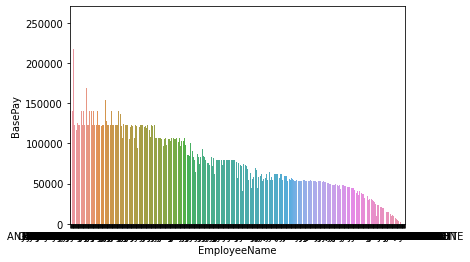

In [ ]:
sns.barplot(x="EmployeeName", y="BasePay", data=med_df);